In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
with open("multiBlock32.csv", "r") as file:
    multiBlock32 = pd.read_csv("multiBlock32.csv", header = None)
    multiBlock32.pop(258)
    multiBlock32.pop(257)
    multiBlock32.pop(0)
    multiBlock32 = np.array(multiBlock32)
print(multiBlock32)
print(multiBlock32.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(64, 256)


In [4]:
errors = np.zeros((32, 256))
print(errors)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
errors[0] = multiBlock32[1] - multiBlock32[0]
print(errors)
print(np.where(errors[0] != 0))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(array([ 61, 137, 153, 154, 169, 187, 188, 193, 194, 195, 209], dtype=int64),)


In [6]:
ind = 0
for i in range(0, multiBlock32.shape[0], 2):
    errors[ind] = multiBlock32[i+1]-multiBlock32[i]
    ind += 1
print(errors)
print(errors.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32, 256)


In [7]:
for i in range(errors.shape[0]):
    print(np.where(errors[i] >= 1))

(array([193, 209], dtype=int64),)
(array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230], dtype=int64),)
(array([184, 207, 214, 218, 238, 242], dtype=int64),)
(array([195], dtype=int64),)
(array([145, 150], dtype=int64),)
(array([], dtype=int64),)
(array([148], dtype=int64),)
(array([123, 175], dtype=int64),)
(array([], dtype=int64),)
(array([122], dtype=int64),)
(array([177], dtype=int64),)
(array([106, 145, 152, 154, 173, 187, 230, 235], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([187], dtype=int64),)
(array([], dtype=int64),)
(array([154], dtype=int64),)
(array([194], dtype=int64),)
(array([164, 171], dtype=int64),)
(array([ 42, 162, 186, 229], dtype=int64),)
(array([ 90, 147, 171, 180, 194, 234], dtype=int64),)
(array([188, 195, 207, 218, 234], dtype=int64),)
(array([ 98, 172, 176, 238, 241], dtype=int64),)
(array([173], dtype=int64),)
(array([], dtype=int64),)
(array([130, 198, 213], dtype=int64),)
(array([], dtype=int64),)
(array([153], dtype=int

In [8]:
errorsDict = {}
for i in range(errors.shape[0]):
    errorsDict.update({i : (np.array(np.where(errors[i, :] >= 1))).flatten()})
print(errorsDict)

{0: array([193, 209], dtype=int64), 1: array([ 93, 130, 164, 169, 170, 172, 185, 193, 214, 230], dtype=int64), 2: array([184, 207, 214, 218, 238, 242], dtype=int64), 3: array([195], dtype=int64), 4: array([145, 150], dtype=int64), 5: array([], dtype=int64), 6: array([148], dtype=int64), 7: array([123, 175], dtype=int64), 8: array([], dtype=int64), 9: array([122], dtype=int64), 10: array([177], dtype=int64), 11: array([106, 145, 152, 154, 173, 187, 230, 235], dtype=int64), 12: array([], dtype=int64), 13: array([], dtype=int64), 14: array([187], dtype=int64), 15: array([], dtype=int64), 16: array([154], dtype=int64), 17: array([194], dtype=int64), 18: array([164, 171], dtype=int64), 19: array([ 42, 162, 186, 229], dtype=int64), 20: array([ 90, 147, 171, 180, 194, 234], dtype=int64), 21: array([188, 195, 207, 218, 234], dtype=int64), 22: array([ 98, 172, 176, 238, 241], dtype=int64), 23: array([173], dtype=int64), 24: array([], dtype=int64), 25: array([130, 198, 213], dtype=int64), 26: ar

In [9]:
errorNums = np.zeros(len(errorsDict.keys()))
for i in range(len(errorsDict.keys())):
    errorNums[i] = errorsDict[i].shape[0]
print(errorNums)

[ 2. 10.  6.  1.  2.  0.  1.  2.  0.  1.  1.  8.  0.  0.  1.  0.  1.  1.
  2.  4.  6.  5.  5.  1.  0.  3.  0.  1.  0.  0.  8.  1.]


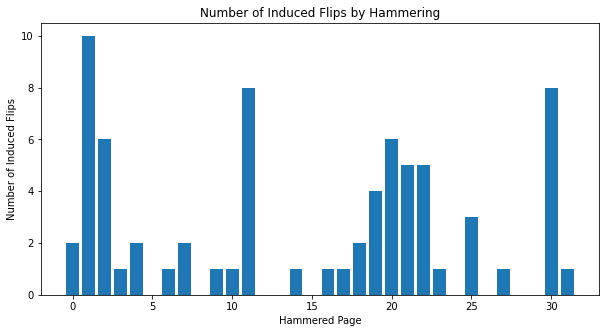

In [10]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errorsDict.keys(), errorNums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()

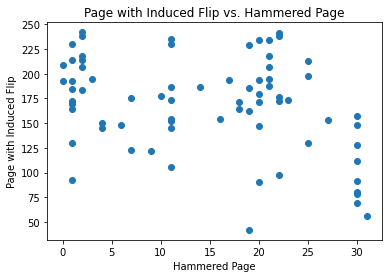

In [11]:
pointsList = []
for i in range(len(errorsDict.keys())):
    for j in range(errorsDict[i].shape[0]):
        pointsList.append((i, errorsDict[i][j]))
#print(pointsList)
x,y = zip(*pointsList)
plt.scatter(x, y)
plt.title("Page with Induced Flip vs. Hammered Page")
plt.xlabel("Hammered Page")
plt.ylabel("Page with Induced Flip")
plt.show()

In [6]:
with open("multiBlock256.csv", "r") as file:
    multiBlock256 = pd.read_csv("multiBlock256.csv", header = None)
    multiBlock256.pop(258)
    multiBlock256.pop(257)
    multiBlock256.pop(0)
    multiBlock256 = np.array(multiBlock256)
print(multiBlock256)
print(multiBlock256.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(512, 256)


In [7]:
errors256 = np.zeros((256, 256))
ind = 0
for i in range(0, multiBlock256.shape[0], 2):
    errors256[ind] = multiBlock256[i+1]-multiBlock256[i]
    ind += 1
print(errors256)
print(errors256.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(256, 256)


In [8]:
errors256Dict = {}
for i in range(errors256.shape[0]):
    errors256Dict.update({i : (np.array(np.where(errors256[i, :] >= 1))).flatten()})
print(errors256Dict)

{0: array([137, 164], dtype=int64), 1: array([140, 149], dtype=int64), 2: array([158], dtype=int64), 3: array([252], dtype=int64), 4: array([108], dtype=int64), 5: array([ 86, 103, 170], dtype=int64), 6: array([142, 170, 172, 173, 206, 246], dtype=int64), 7: array([194], dtype=int64), 8: array([], dtype=int64), 9: array([ 86,  97, 122, 185, 238], dtype=int64), 10: array([ 21,  73,  96, 127, 131, 184, 206, 237], dtype=int64), 11: array([ 79,  92, 106, 155, 181, 236, 244], dtype=int64), 12: array([111, 125, 173, 174, 202, 244], dtype=int64), 13: array([116, 156], dtype=int64), 14: array([97], dtype=int64), 15: array([], dtype=int64), 16: array([101], dtype=int64), 17: array([131], dtype=int64), 18: array([ 67, 139], dtype=int64), 19: array([236], dtype=int64), 20: array([106, 170, 184, 196, 215], dtype=int64), 21: array([169, 238], dtype=int64), 22: array([144, 164, 170, 187, 199], dtype=int64), 23: array([], dtype=int64), 24: array([113, 147, 148, 170, 181, 185], dtype=int64), 25: array

In [9]:
error256Nums = np.zeros(len(errors256Dict.keys()))
for i in range(len(errors256Dict.keys())):
    error256Nums[i] = errors256Dict[i].shape[0]
print(error256Nums)

[2. 2. 1. 1. 1. 3. 6. 1. 0. 5. 8. 7. 6. 2. 1. 0. 1. 1. 2. 1. 5. 2. 5. 0.
 6. 4. 1. 1. 2. 1. 6. 1. 0. 0. 1. 0. 0. 0. 1. 0. 2. 0. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 2. 0. 1. 1. 0. 0. 0. 2. 1. 1. 0. 0. 0. 1. 0. 3. 2. 0. 2. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0.
 2. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 2. 5. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 2. 0. 0. 2. 0. 1.
 0. 0. 0. 0. 2. 0. 2. 2. 1. 0. 0. 0. 0. 0. 2. 0. 1. 1. 2. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 2. 1. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 0. 2. 0. 1. 0. 0. 0. 2. 1. 1. 1. 0. 1. 3. 0. 2. 0. 1. 1. 2. 0.
 0. 0. 0. 0. 2. 0. 1. 1. 1. 2. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 2. 0. 2. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


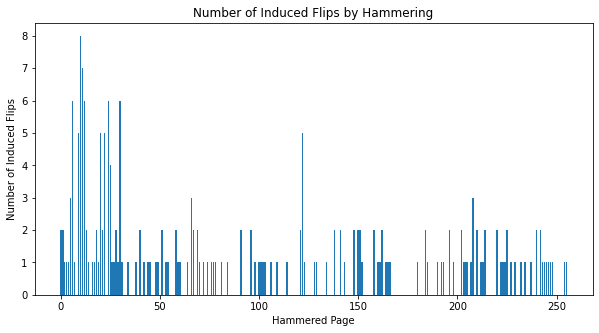

In [11]:
fig = plt.figure(figsize = (10, 5))
plt.bar(errors256Dict.keys(), error256Nums)
plt.title("Number of Induced Flips by Hammering")
plt.xlabel("Hammered Page")
plt.ylabel("Number of Induced Flips")
plt.show()

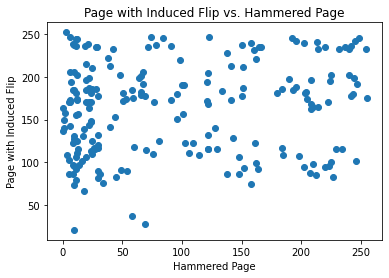

In [12]:
pointsList256 = []
for i in range(len(errors256Dict.keys())):
    for j in range(errors256Dict[i].shape[0]):
        pointsList256.append((i, errors256Dict[i][j]))
#print(pointsList)
x,y = zip(*pointsList256)
plt.scatter(x, y)
plt.title("Page with Induced Flip vs. Hammered Page")
plt.xlabel("Hammered Page")
plt.ylabel("Page with Induced Flip")
plt.show()